<a href="https://colab.research.google.com/github/Abbujaa/datascience/blob/main/Introduction_to_Ensemble_Learning_and_Bagging.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Project: Ensamble learning: Bagging

### Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, multilabel_confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay

1- Load the dataset weather.csv. Check the structure of the data by inspecting the number of rows, columns, and attributes of the dataset. You can use functions like .shape, .head(), .info(), and .describe() to get a quick overview of the data.

In [3]:
df=pd.read_csv("weather.csv")
df.head()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainTomorrow
0,8.0,24.3,0.0,30.0,6.0,20,68,29,1019.7,1015.0,14.4,23.6,Yes
1,14.0,26.9,3.6,39.0,4.0,17,80,36,1012.4,1008.4,17.5,25.7,Yes
2,13.7,23.4,3.6,85.0,6.0,6,82,69,1009.5,1007.2,15.4,20.2,Yes
3,13.3,15.5,39.8,54.0,30.0,24,62,56,1005.5,1007.0,13.5,14.1,Yes
4,7.6,16.1,2.8,50.0,20.0,28,68,49,1018.3,1018.5,11.1,15.4,No


In [4]:
df.isnull().sum()

,0
MinTemp,0
MaxTemp,0
Rainfall,0
WindGustSpeed,2
WindSpeed9am,7
WindSpeed3pm,0
Humidity9am,0
Humidity3pm,0
Pressure9am,0
Pressure3pm,0


In [5]:
df.dropna(inplace=True)


2- Visualize the quantity of the number of days with rainfall.

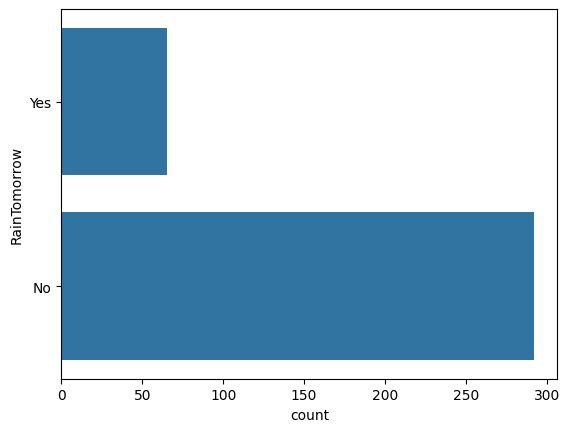

In [6]:
sns.countplot(df.RainTomorrow)
plt.show()

3- Transform RainTomorrow to a numeric variable using map

In [7]:
df['RainTomorrow']=df['RainTomorrow'].map({'Yes':1,'No':0})

4- Separate the target and the features into two variables.

In [8]:
X=df.drop(columns = 'RainTomorrow')
y=df.RainTomorrow

5- Split the dataset into 30% test and 70% train.

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

9- Create an empty list where we will store the trained models and choose how many models to train (Start with some value between 5 and 10)

In [10]:
lista_de_modelos = []
N_modelos = 10

6- Train each model and save each trained model to a list. To do the split, use the `train_test_split` function.
   What set are you going to split on? Do I have to set the `random_state`?

In [11]:
for i in range(N_modelos):
    X_train_boostrap, X_test_bootstrap, y_train_boostrap, y_test_bootstrap = train_test_split(X_train, y_train, test_size=0.5, stratify = y_train)
    clf = DecisionTreeClassifier(max_depth = 10) # it could be overfitted
    clf.fit(X_train_boostrap, y_train_boostrap)
    lista_de_modelos.append(clf)


7- Check the accuracy of each model using the set of the test dataset.

In [12]:
for idx, modelo in enumerate(lista_de_modelos):
    y_test_pred = modelo.predict(X_test)
    y_train_pred= modelo.predict(X_train)
    print('Accuracy ', idx, ' test: ', accuracy_score(y_test, y_test_pred), 'train:', accuracy_score(y_train, y_train_pred))


Accuracy  0  test:  0.8611111111111112 train: 0.9196787148594378
Accuracy  1  test:  0.8333333333333334 train: 0.891566265060241
Accuracy  2  test:  0.8333333333333334 train: 0.9116465863453815
Accuracy  3  test:  0.7037037037037037 train: 0.891566265060241
Accuracy  4  test:  0.8333333333333334 train: 0.9236947791164659
Accuracy  5  test:  0.7685185185185185 train: 0.8835341365461847
Accuracy  6  test:  0.7407407407407407 train: 0.8835341365461847
Accuracy  7  test:  0.7592592592592593 train: 0.8634538152610441
Accuracy  8  test:  0.8333333333333334 train: 0.891566265060241
Accuracy  9  test:  0.7592592592592593 train: 0.8714859437751004


8- Evaluate the accuracy of the entire ensemble using the test dataset. We will do this by using an average of the probabilities returned by each tree.

If the average probability is greater than 0.5, we classify it as positive. For it:
  
   > Initialize a probability matrix the size of the number of instances in the test set to zeros.


In [13]:
probs_test_pred = np.zeros(y_test.size)

# Go through the list of models and predict the probabilities.
for modelo in lista_de_modelos:
    probs_test_pred_modelo = modelo.predict_proba(X_test)
    probs_test_pred +=probs_test_pred_modelo[:,1]

# Divide probs_test_pred by the number of models.
probs_test_pred = probs_test_pred/N_modelos


9- Go through the list of models and predict the probabilities. Look how the `shape` of that predicted arrangement is. Choose the probabilities that correspond to the positive class. Then, add them to the vector that you defined before.
Then, divide probs_test_pred by the number of models.

In [15]:
# Ensure y_test is numeric
y_test_numeric = y_test.map({'Yes': 1, 'No': 0})

# # Calculate accuracy using numeric labels
# ensemble_accuracy = accuracy_score(y_test_numeric, y_pred)
# print(f'Ensemble Accuracy: {ensemble_accuracy:.4f}')


# round(accuracy_score(y_test_numeric, y_pred_final),2)


10- Create the predicted classes (0s and 1s) by comparing the predicted probability to the threshold probability (0.5). Then, evaluate the accuracy of the ensemble.

In [16]:
y_test_pred = probs_test_pred>0.5
y_test_pred = y_test_pred.astype(int)


### A scikit-learn Example

11- Explore sci-kit-learn's `BaggingClassfier` and some of its features. Use it to predict the train and test, and measure its performance.

In [17]:
from sklearn.ensemble import BaggingClassifier

clf = BaggingClassifier(estimator=DecisionTreeClassifier(), bootstrap_features=False, n_estimators= 100, n_jobs = -1,random_state=42)
clf.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100,
                  n_jobs=-1, random_state=42)

12- Evaluate the accuracy of the training and testing dataset.

In [18]:
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)
print(accuracy_score(y_train, y_train_pred))
print(accuracy_score(y_test, y_test_pred))


1.0
0.8703703703703703


### Decision boundaries

13- For the following activity let's train a BaggingClassifier using only two features: ['MaxTemp', 'Humidity3pm'] and set random_state to 42.

In [19]:
clf = BaggingClassifier(estimator=DecisionTreeClassifier(), bootstrap_features=False, n_estimators= 100, n_jobs = -1,random_state=42)
clf.fit(X_train[['MaxTemp', 'Humidity3pm']], y_train)
y_test_pred = clf.predict(X_test[['MaxTemp', 'Humidity3pm']])

14- Compute the accuracy of the testing dataset

In [20]:
print(accuracy_score(y_train, y_train_pred))

1.0


15- Plot the decision boundaries.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(


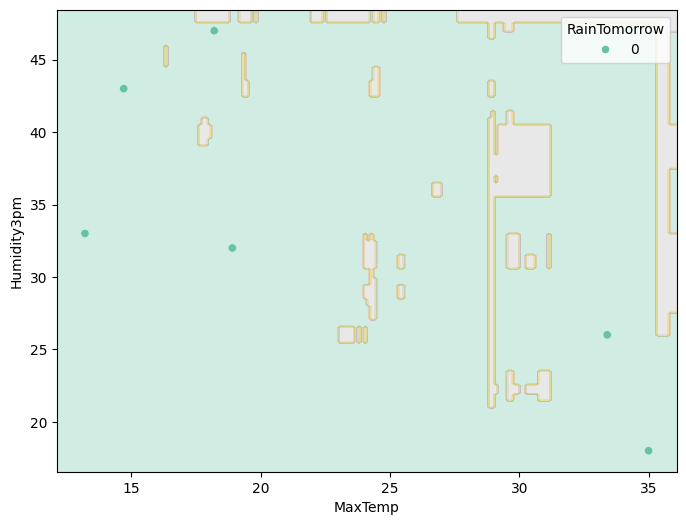

In [23]:
N = 20

plt.figure(figsize = (8,6))

ax = sns.scatterplot(x=X_test[::N].MaxTemp, y= X_test[::N].Humidity3pm, hue=y_test[::N], palette='Set2')
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                      np.linspace(*ylim, num=200))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
contours = ax.contourf(xx, yy, Z, alpha=0.3, cmap = 'Set2')

plt.show()


In [25]:
 # Instantiate bc
clf = BaggingClassifier(estimator=DecisionTreeClassifier(),oob_score=True, bootstrap_features=False, n_estimators= 100, n_jobs = -1)
clf.fit(X_train[['MaxTemp', 'Humidity3pm']], y_train)
y_train_pred = clf.predict(X_train[['MaxTemp', 'Humidity3pm']])
y_test_pred = clf.predict(X_test[['MaxTemp', 'Humidity3pm']])

# Evaluate OOB accuracy
acc_oob = clf.oob_score_
clf.oob_score_


0.7751004016064257